In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

API keys can be found here: https://twelvedata.com/account/api-keys

In [6]:
# Set up parameters for the data request
symbol = "^FVX" # Treasury Yield 5 Years
#symbol = "^TYX" # Treasury Yield 30 Years

# Fetch historical data for the specified period
data = yf.Ticker(symbol).history(period="10y", interval="1d")

Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).


                            Open   High    Low  Close  Volume  Dividends  \
Date                                                                       
2024-12-03 00:00:00-06:00  4.099  4.109  4.055  4.106       0        0.0   
2024-12-04 00:00:00-06:00  4.151  4.160  4.057  4.062       0        0.0   
2024-12-05 00:00:00-06:00  4.097  4.118  4.071  4.076       0        0.0   
2024-12-06 00:00:00-06:00  4.088  4.106  4.008  4.034       0        0.0   
2024-12-09 00:00:00-06:00  0.000  0.000  0.000  4.072       0        0.0   

                           Stock Splits  
Date                                     
2024-12-03 00:00:00-06:00           0.0  
2024-12-04 00:00:00-06:00           0.0  
2024-12-05 00:00:00-06:00           0.0  
2024-12-06 00:00:00-06:00           0.0  
2024-12-09 00:00:00-06:00           0.0  


Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4017 ticks ([16232.0, ..., 20248.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

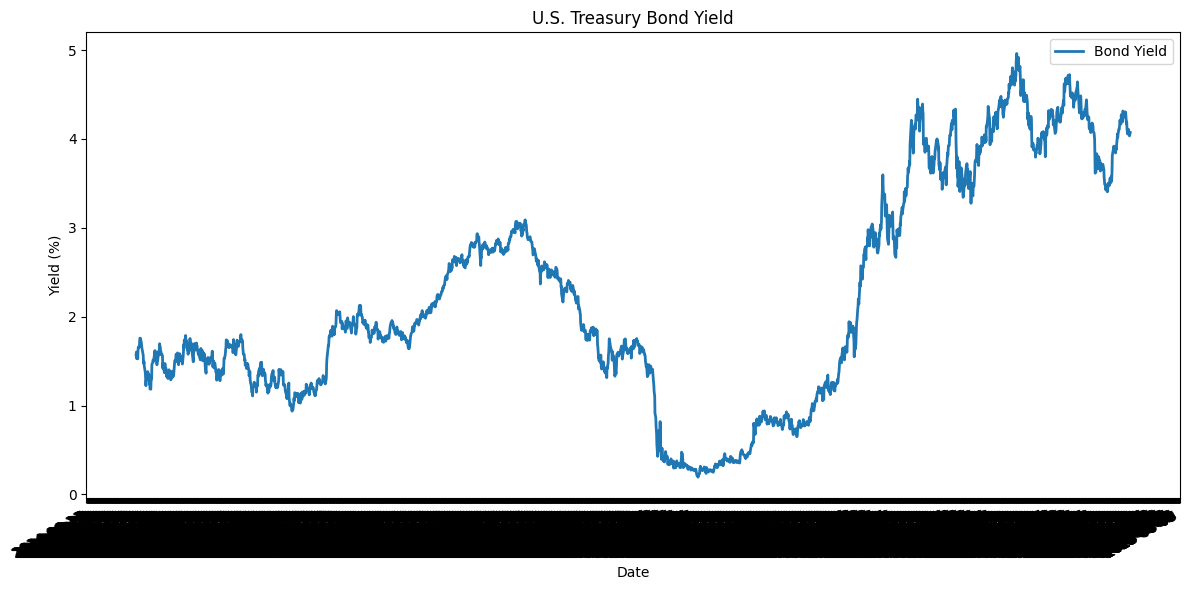

In [7]:
# Check if data was returned
if not data.empty:
    # Print the last few rows of data for verification
    print(data.tail())

    # Plotting the yield data
    fig, ax = plt.subplots(figsize=(12, 6))

    data['Close'].plot(ax=ax, linewidth=2)

    plt.title('U.S. Treasury Bond Yield')
    plt.xlabel('Date')
    plt.ylabel('Yield (%)')
    plt.xticks(rotation=45, ha='right')

    # Set major locator to days
    ax.xaxis.set_major_locator(mdates.DayLocator())

    # Define a custom formatter function for displaying dates
    def date_formatter(x, pos):
        date = mdates.num2date(x)
        return date.strftime('%Y-%m-%d')

    ax.xaxis.set_major_formatter(FuncFormatter(date_formatter))
    plt.gcf().autofmt_xdate()

    plt.legend(['Bond Yield'])

    plt.tight_layout()
    plt.show()
else:
    print("No data found for the specified symbol.")